# Lasso Regression 

LASSO stands for Least Absolute Shrinkage and Selection Operator.
This is same as Ridge regression but the penalty is calculated as:
λ X Modulus of slope
So, the equation will be:
equation of line + the sum of squared residuals + λ x | slope|
Lasso regression offers some bias but very low variance.
Note: Ridge regression has L2 penalty term. L2 indicates ‘square of slope’. Lasso regression has L1
penalty term. L1 indicates ‘absolute value of slope’.
1. Lasso regression is useful to reduce variance. Hence predictions will be more accurate than Ridge
regression.
2. Ridge regression includes all (or none) of the features in the model. But Lasso regression arbitrarily
selects any one feature among the highly correlated features. Other features are not taken into
consideration.
One important use of Lasso regression is in ‘feature selection’. When using a model, we should take that
feature (or column) that influences the result in a maximum manner. This is the feature having highest
coefficient value.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
nd=pd.read_csv('E:/ppts/machine learning/Advertising.csv')
nd

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
x=nd.drop('sales',axis=1)
x
y=nd['sales'].values
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [7]:
names=x.columns
names

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper'], dtype='object')

In [8]:
rng=range(len(names))
rng

range(0, 4)

In [10]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.1)
ls_coef=ls.fit(x,y).coef_

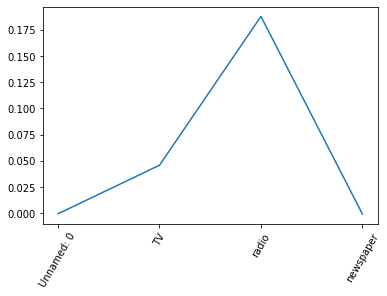

In [11]:
plt.plot(rng,ls_coef)
plt.xticks(rng,names,rotation=60)
plt.ylabel=('Coefficents')

In [12]:
##according to the diagram  radio column is more influencing the sales calumn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
ls.fit(x_train,y_train)
y_pred=ls.predict(x_test)

In [13]:
y_pred

array([21.65576651, 16.44784196,  7.71164484, 17.92136374, 18.66041406,
       23.76605449, 16.27583612, 13.4523923 ,  9.16278094, 17.31150276,
       14.42877437,  9.85320542, 17.2768357 , 16.61685191, 15.09122055,
       15.48633104, 12.42831575, 17.34310981, 11.03712631, 18.06149797,
        9.36867174, 12.78607433,  8.73840314, 10.47986002, 11.39121744,
       15.02160929,  9.74642849, 19.45375912, 18.17788902, 17.21305398,
       21.56350675, 14.6953083 , 16.25145284, 12.36691447, 19.95958662,
       15.36974267, 14.00513941, 10.08711101, 20.91411159,  7.43422927,
        3.68004965,  7.28723264,  5.99126617, 18.4179471 ,  8.32106743,
       14.11979293, 14.92578987, 20.35907494, 20.54528887, 19.53944345,
       24.09155646, 14.84562264,  6.71755995, 19.7689507 , 18.95268401,
       12.50863973, 14.19778616,  6.11348682, 15.36636052,  9.56449531])

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) #92.23 accuracy

0.922318528409514